In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data", index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
#differet sacales!!

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_feat = scaler.transform(df.drop("TARGET CLASS", axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_feat, columns=df.columns[:-1])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_feat
y = df["TARGET CLASS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [26]:
err_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    pred_i = knn.predict(X_test)
    
    err_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

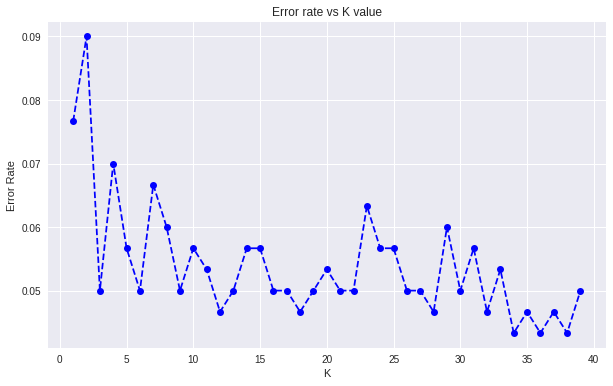

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate, color="blue", linestyle="dashed",marker="o")
plt.title("Error rate vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [30]:
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=36


[[153   6]
 [  7 134]]


             precision    recall  f1-score   support

          0       0.96      0.96      0.96       159
          1       0.96      0.95      0.95       141

avg / total       0.96      0.96      0.96       300

